# House Prices Estimation

In [50]:
# https://www.youtube.com/watch?v=myPpL18WqYs -----Videosundan yararlanilarak tarafimizdan hazirlanmistir.

import pandas as pd
import numpy as np

df = pd.read_csv("home_data.csv")
df.head(3)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062


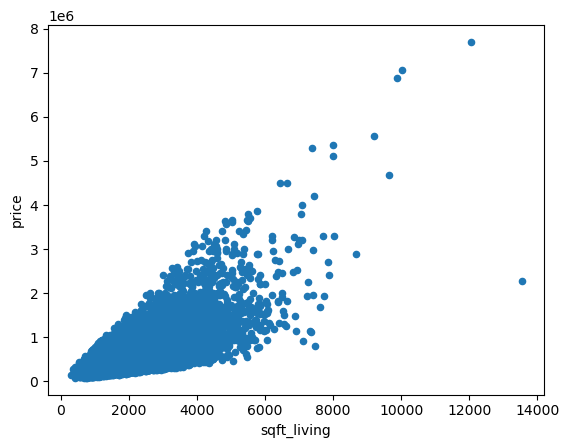

In [10]:
%matplotlib inline

df.plot(x="sqft_living", y="price", kind="scatter");

# Create a New DataFrame

In [31]:
# We have made a set of variables that we want to use in the analysis. We can change the performance of the model by increasing or decreasing them. 
variables=["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "zipcode"]

In [32]:
df[variables].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074


# Descriptive stats.

In [33]:
from pandas import set_option
set_option("display.width", 100)
pd.options.display.precision = 2
description = df[variables].describe()
print(description)

       bedrooms  bathrooms  sqft_living  sqft_lot    floors   zipcode
count  21613.00   21613.00     21613.00  2.16e+04  21613.00  21613.00
mean       3.37       2.11      2079.90  1.51e+04      1.49  98077.94
std        0.93       0.77       918.44  4.14e+04      0.54     53.51
min        0.00       0.00       290.00  5.20e+02      1.00  98001.00
25%        3.00       1.75      1427.00  5.04e+03      1.00  98033.00
50%        3.00       2.25      1910.00  7.62e+03      1.50  98065.00
75%        4.00       2.50      2550.00  1.07e+04      2.00  98118.00
max       33.00       8.00     13540.00  1.65e+06      3.50  98199.00


# Correlation Analysis

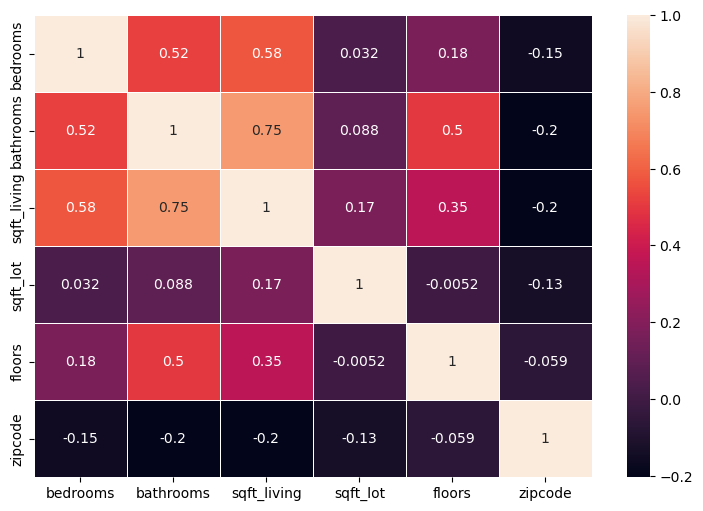

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

j = df[variables].corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(j, annot=True, linewidths=0.5, ax=ax);

# Split the Dataset as Train and Test

In [39]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, random_state=0)

In [42]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(train_data[variables], train_data["price"])

LinearRegression()

In [43]:
# Model ogrendi. Simdi bir evin gercek fiyati ile tahmin edilen fiyatini karsilastiralim. 
# Bunun icin Id= 6414100192 olan evi kullanalim

house1 = df[df["id"]==6414100192]
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639


In [44]:
print(house1["price"])

1    538000
Name: price, dtype: int64


In [45]:
print(model1.predict(house1[variables]))

[751813.35462197]


In [ ]:
# Evin gercek fiyati 538000 iken model bunu 751813 olarak tahmin etti, aradaki fark yuksek. 

In [46]:
# Bska bir evi daha inceleyelim;

house2 = df[df["id"]==5309101200]
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.68,-122.37,1250,4880


In [47]:
print(house2["price"])

1054    620000
Name: price, dtype: int64


In [48]:
print(model1.predict(house2[variables]))

[637556.26515923]


In [49]:
# Bu kez evin fiyati 620000 iken model gorece daha iyi bir performans sergileyerek 637556 dedi.

In [61]:
# Iki tahmin sonucu arasinda cok fark cikti. Modelin genel performansini olcmek icin R2 degerine bakalim;


print("R2 (train): {:.3f}" .format(model1.score(train_data[variables], train_data["price"]))                                )
print("R2  (test): {:.3f}" .format(model1.score(test_data[variables],  test_data["price"])))

R2 (train): 0.518
R2  (test): 0.499


In [ ]:
# Model eksik ogrenmis, zayif bir model. Degisken sayisi artirilabilir, degistirilebilir. 

In [64]:
# Varsayalim ki modelimiz basarili ve biz de bu modeli kullanarak yeni bir evin fiyatini belirlemek istiyoruz. 

newhouse = {"bedrooms":[8],
         "bathrooms": [25],
          "sqft_living": [50000],
          "sqft_lot":[225000],
          "floors": [4],
          "zipcode": "98039",
          "condition":[10],
          "grade":[10],
          "watefront":[1],
          "view":[4],
          "sqft_above":37500,
          "sqft_basement":[12500],
          "yr_built": [1994],
          "yr_renovated":[2010],
          "lat":[47.627606],
          "long":[-122.242054],
          "sqft_living15":[5000],
          "sqft_lot":[40000]}

In [66]:
print(model1.predict(pd.DataFrame(newhouse)[variables])) # Yeni evin bilgilerini DF olarak okuttuk.

[15850545.57671379]


In [ ]:
# Kurdugumuz model bu evin fiyatinin $15,850,545 olmasinin gerektigini gosterdi.

In [ ]:
# Degisken sayisini artirarak veya degiskenleri degistirerek farkli sonuclara ulasmak mumkundur. 